In [39]:
!pip install kaggle


### Dataset Download & Setup (Kaggle API)
To work with the Procurement Strategy Dataset for Kraljic Matrix, we used the official Kaggle API to programmatically download the dataset.


In [40]:
import os
import json
import numpy as np
# Upload kaggle.json here in Colab
from google.colab import files
files.upload()

# Move to right location
os.makedirs("/root/.kaggle", exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json


In [41]:
!kaggle datasets download -d shahriarkabir/procurement-strategy-dataset-for-kraljic-matrix --unzip


Dataset URL: https://www.kaggle.com/datasets/shahriarkabir/procurement-strategy-dataset-for-kraljic-matrix
License(s): CC0-1.0
  0% 0.00/13.5k [00:00<?, ?B/s]
100% 13.5k/13.5k [00:00<00:00, 30.8MB/s]


### Data Processing
Before performing modeling or in-depth analysis, the dataset undergoes essential data processing steps to ensure quality, consistency, and readiness for feature engineering and visualization.

In [42]:
import pandas as pd

df = pd.read_csv("realistic_kraljic_dataset.csv")
df.head()


,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   object 
 1   Product_Name          1000 non-null   object 
 2   Supplier_Region       1000 non-null   object 
 3   Lead_Time_Days        1000 non-null   int64  
 4   Order_Volume_Units    1000 non-null   int64  
 5   Cost_per_Unit         1000 non-null   float64
 6   Supply_Risk_Score     1000 non-null   int64  
 7   Profit_Impact_Score   1000 non-null   int64  
 8   Environmental_Impact  1000 non-null   int64  
 9   Single_Source_Risk    1000 non-null   object 
 10  Kraljic_Category      1000 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 86.1+ KB


#### Check for Missing Values
This helps ensure the dataset is complete. If any missing values are detected, they can be handled via imputation or row removal.



In [44]:
df.isnull().sum()

,0
Product_ID,0
Product_Name,0
Supplier_Region,0
Lead_Time_Days,0
Order_Volume_Units,0
Cost_per_Unit,0
Supply_Risk_Score,0
Profit_Impact_Score,0
Environmental_Impact,0
Single_Source_Risk,0


## Exploratory Data Visualization

As part of the SmartProcure project, visualizing the dataset helps uncover patterns and relationships critical to procurement classification using the Kraljic Matrix. Below are two essential visualizations and their implications for our modeling and strategic decision-making.

       Product_ID     Product_Name Supplier_Region  Lead_Time_Days  \
count        1000             1000            1000     1000.000000   
unique       1000               16               6             NaN   
top         P1000  Specialty Gases            Asia             NaN   
freq            1               72             269             NaN   
mean          NaN              NaN             NaN       47.508000   
std           NaN              NaN             NaN       23.630454   
min           NaN              NaN             NaN        7.000000   
25%           NaN              NaN             NaN       27.000000   
50%           NaN              NaN             NaN       48.000000   
75%           NaN              NaN             NaN       67.000000   
max           NaN              NaN             NaN       89.000000   

        Order_Volume_Units  Cost_per_Unit  Supply_Risk_Score  \
count          1000.000000    1000.000000        1000.000000   
unique                 NaN     

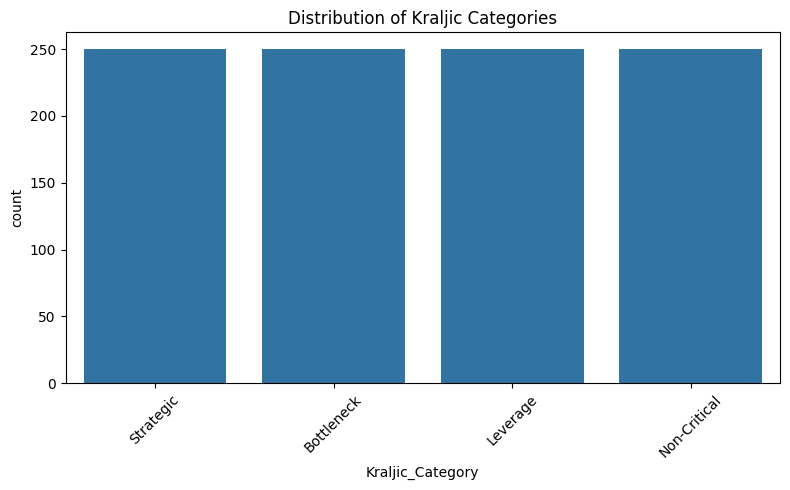

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(df.describe(include='all'))

# Plot category distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Kraljic_Category', order=df['Kraljic_Category'].value_counts().index)
plt.title("Distribution of Kraljic Categories")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Figure 1** shows the distribution of procurement items across the four Kraljic Matrix categories: Strategic, Bottleneck, Leverage, and Non-Critical. Each category contains approximately 250 items, confirming that the dataset is perfectly balanced. This balance is essential for training classification models as it prevents bias toward any single class and supports generalizable, fair predictions across all procurement types.

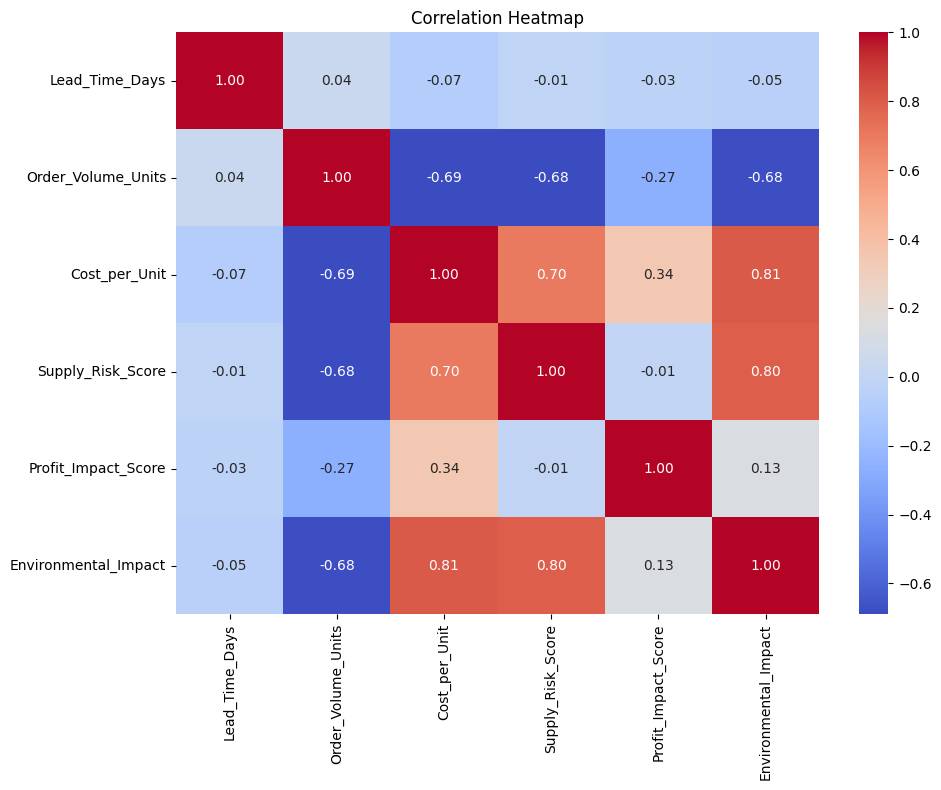

In [46]:
# Correlation heatmap
numerical_features = [
    'Lead_Time_Days',
    'Order_Volume_Units',
    'Cost_per_Unit',
    'Supply_Risk_Score',
    'Profit_Impact_Score',
    'Environmental_Impact'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

**Figure 2** presents a correlation heatmap illustrating the relationships between key numerical features such as lead time, order volume, cost per unit, and various risk scores. Strong positive correlations—such as between Cost_per_Unit and both Supply_Risk_Score and Environmental_Impact—highlight that higher-cost items often come with greater risk and sustainability concerns. Conversely, high order volumes show negative correlations with those risk factors, suggesting that commoditized items are generally more stable and less risky.

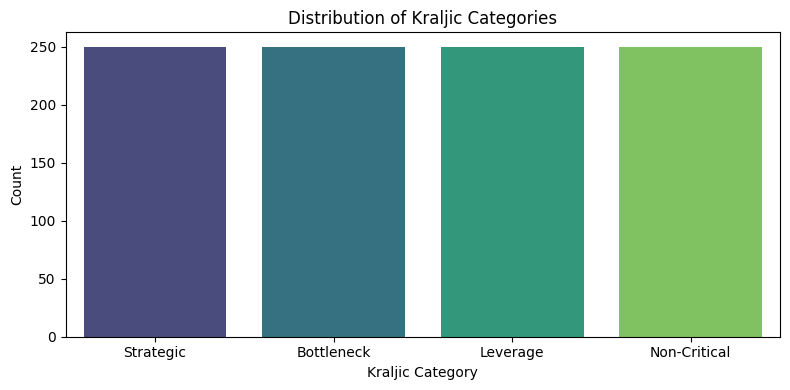

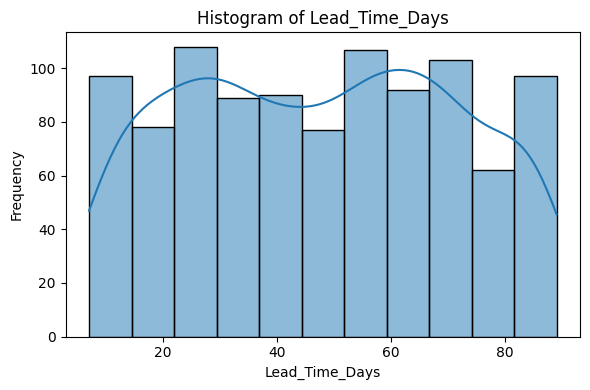

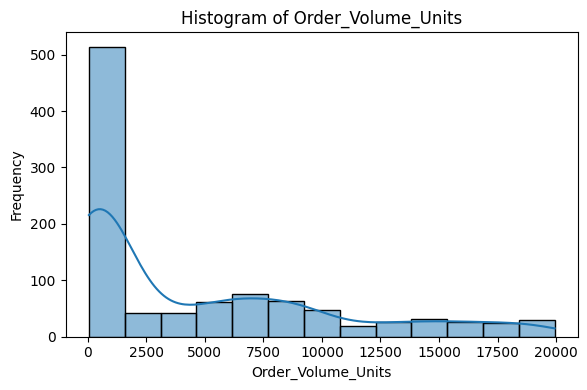

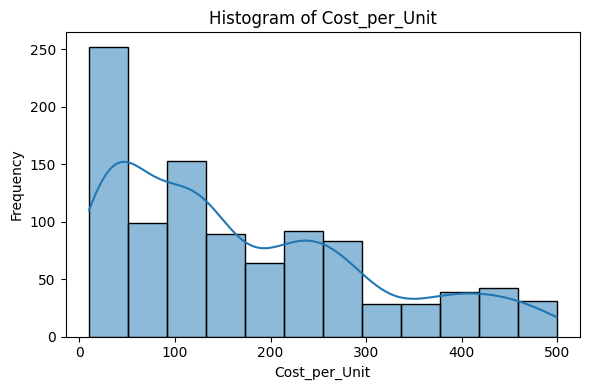

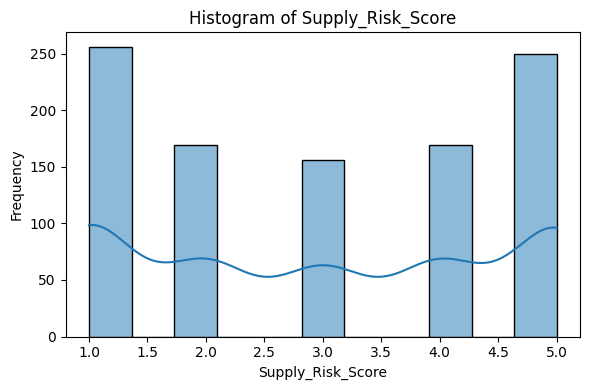

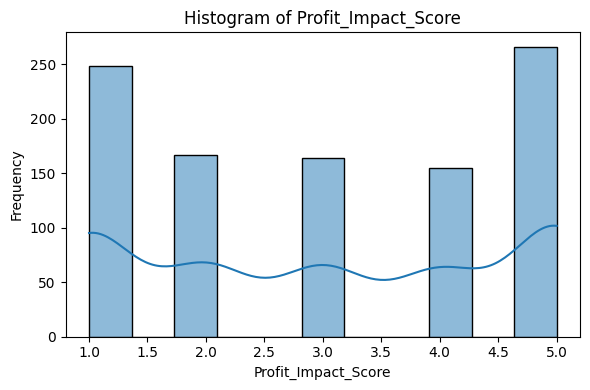

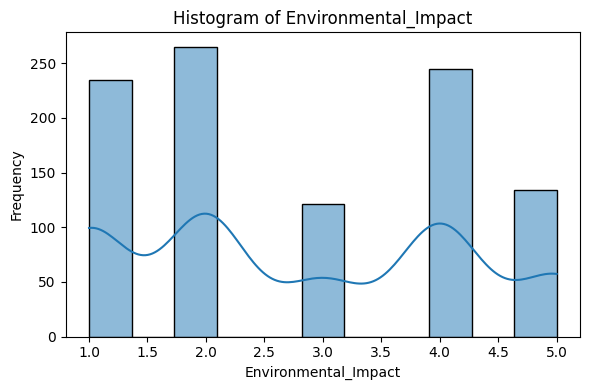

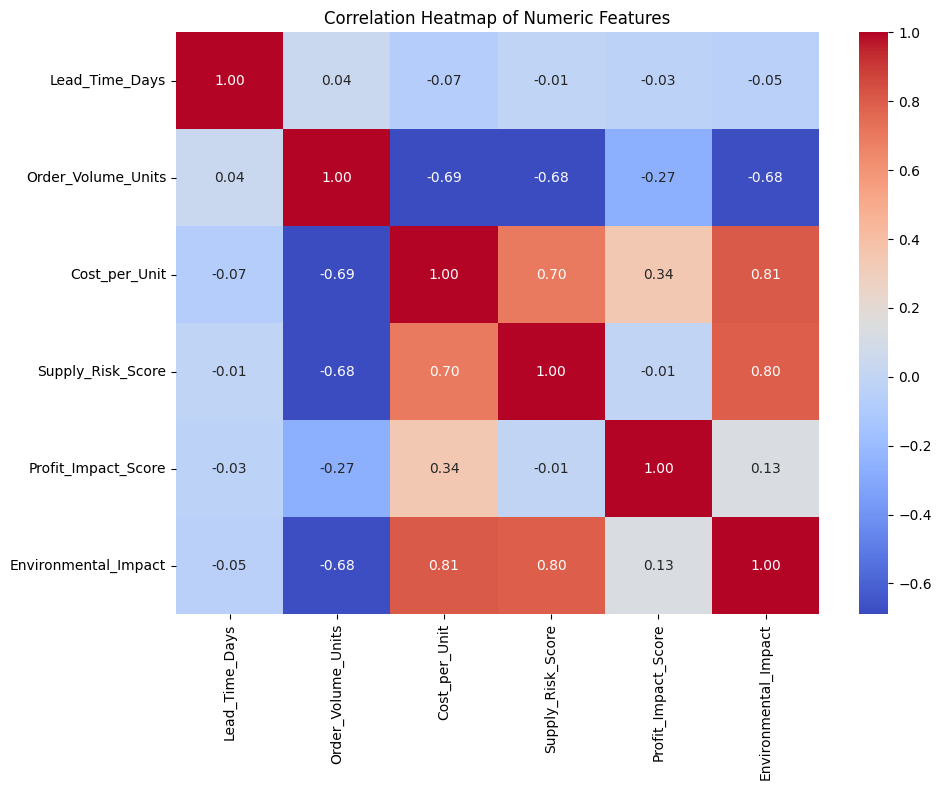

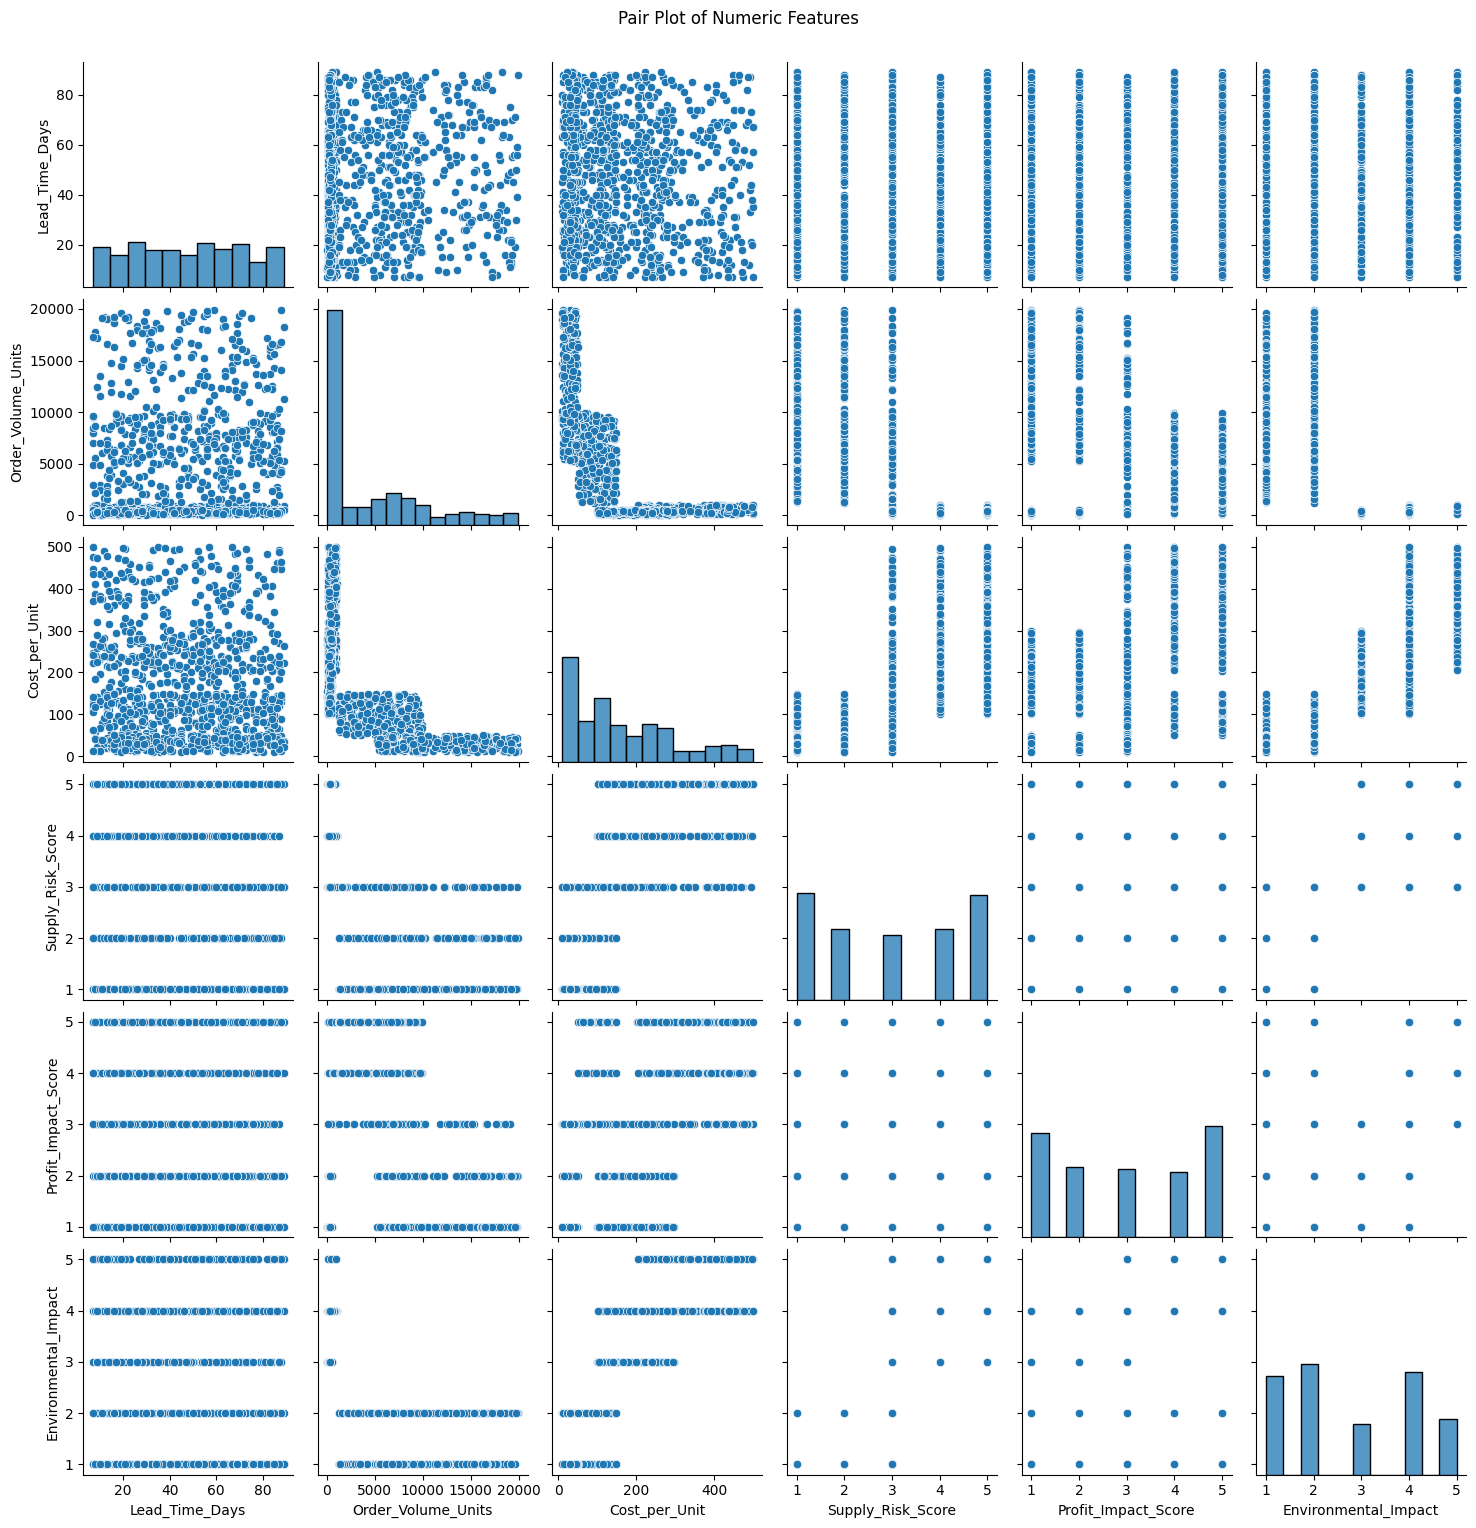

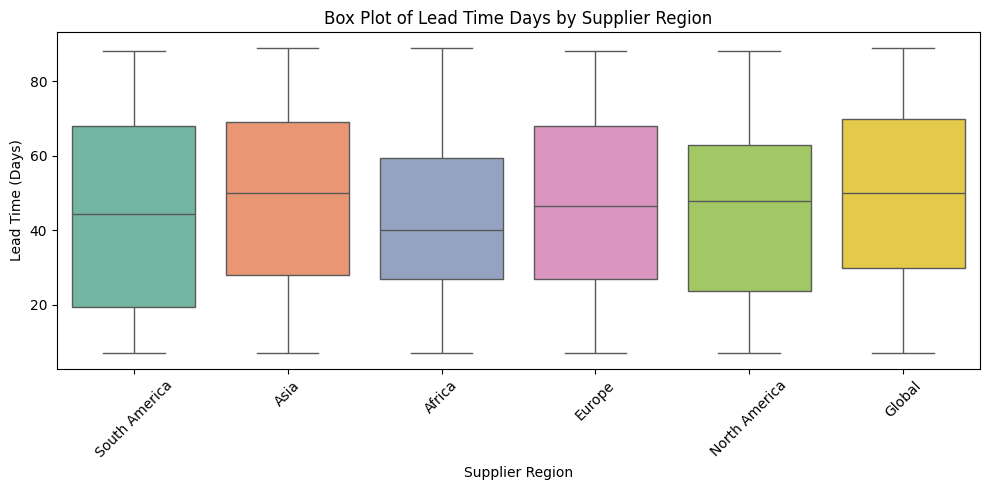

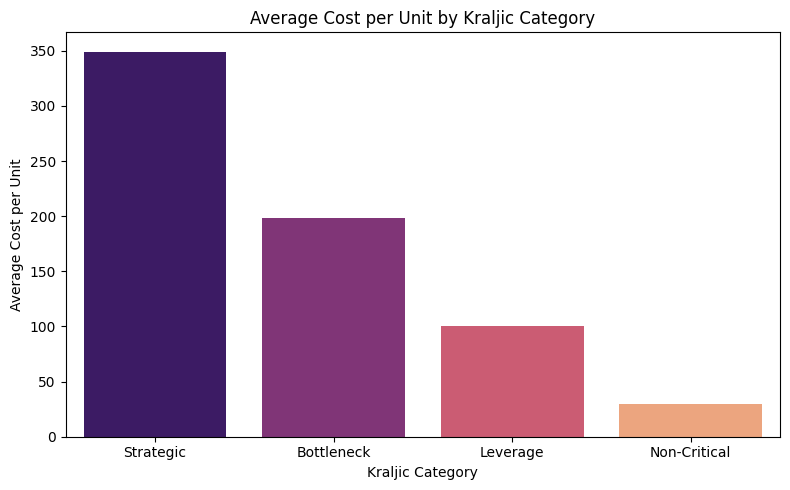

In [47]:
### Distribution of Kraljic Category
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Kraljic_Category', palette='viridis')
plt.title('Distribution of Kraljic Categories')
plt.xlabel('Kraljic Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

### Histograms of Numeric Features
numeric_df = df.select_dtypes(include=[np.number])
numeric_features = numeric_df.columns

for feature in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_df[feature], kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### Correlation Heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()

### Pair Plot of Numeric Features
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features', y=1.02)
plt.show()

### Box Plot: Lead Time Days across Supplier Regions
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Supplier_Region', y='Lead_Time_Days', palette='Set2')
plt.title('Box Plot of Lead Time Days by Supplier Region')
plt.xlabel('Supplier Region')
plt.ylabel('Lead Time (Days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Grouped Barplot: Average Cost per Unit by Kraljic Category
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Kraljic_Category', y='Cost_per_Unit', palette='magma', ci=None)
plt.title('Average Cost per Unit by Kraljic Category')
plt.xlabel('Kraljic Category')
plt.ylabel('Average Cost per Unit')
plt.tight_layout()
plt.show()


### 📊 EDA Insights and Their Importance in SmartProcure

- ✅ **Balanced Kraljic Categories**  
  The category distribution plot shows an equal number of items in Strategic, Bottleneck, Leverage, and Non-Critical classes, which ensures balanced model training and avoids classification bias.

- 📈 **Lead Time Distribution**  
  The histogram of `Lead_Time_Days` indicates a near-uniform distribution, suggesting diverse supplier lead time patterns — useful for differentiating regional procurement strategies.

- 📦 **Order Volume & Cost Distributions**  
  `Order_Volume_Units` and `Cost_per_Unit` are right-skewed, highlighting the presence of a few very high-volume or high-cost items. These outliers could have a major influence on procurement risk and should be treated carefully in modeling.

- 🌍 **Risk and Impact Score Variability**  
  Histograms of `Supply_Risk_Score`, `Profit_Impact_Score`, and `Environmental_Impact` demonstrate wide distribution across the scale, confirming the dataset reflects varied sourcing challenges and sustainability concerns.

- 🔥 **Correlation Heatmap Findings**  
  Strong positive correlations were observed:  
  - `Cost_per_Unit` ↔ `Supply_Risk_Score`  
  - `Cost_per_Unit` ↔ `Environmental_Impact`  

  These insights validate that higher-cost items are typically riskier and more environmentally impactful, which aligns with real-world procurement dynamics.

- 🧩 **Pair Plot Insights**  
  The pair plot reveals potential linear and non-linear patterns between features and shows where natural clusters or category separability may exist — useful for model building or segmentation.

- 📦 **Supplier Region vs Lead Time**  
  The box plot shows how `Lead_Time_Days` varies across `Supplier_Region`, revealing regions with longer or more volatile lead times, which can inform supplier risk evaluation and sourcing strategy.


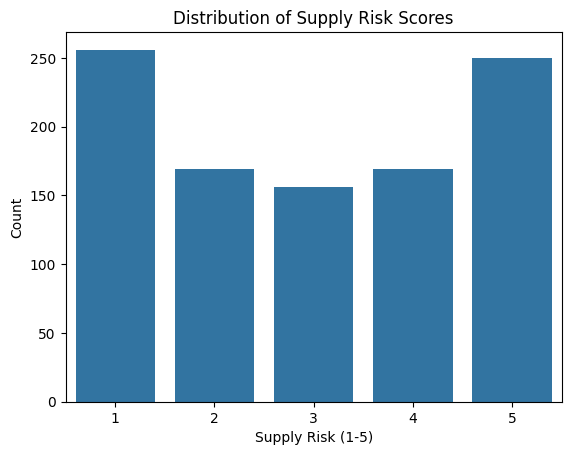

In [48]:
sns.countplot(x='Supply_Risk_Score', data=df)
plt.title('Distribution of Supply Risk Scores')
plt.xlabel('Supply Risk (1-5)')
plt.ylabel('Count')
plt.show()

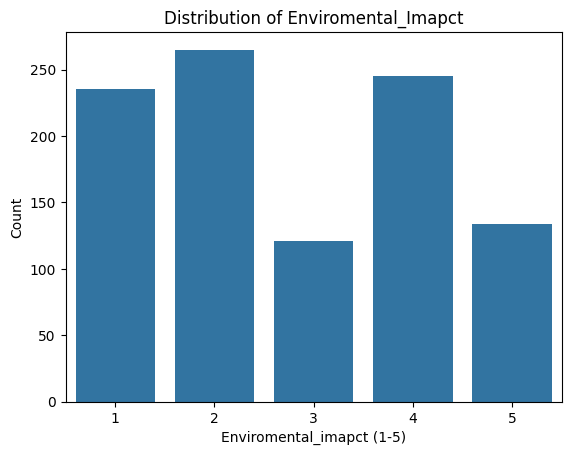

In [49]:
sns.countplot(x='Environmental_Impact', data=df)
plt.title('Distribution of Enviromental_Imapct')
plt.xlabel('Enviromental_imapct (1-5)')
plt.ylabel('Count')
plt.show()

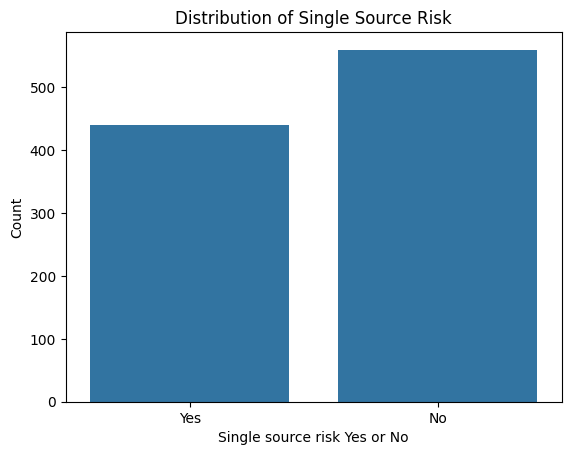

In [50]:
sns.countplot(x='Single_Source_Risk', data=df)
plt.title('Distribution of Single Source Risk')
plt.xlabel('Single source risk Yes or No')
plt.ylabel('Count')
plt.show()

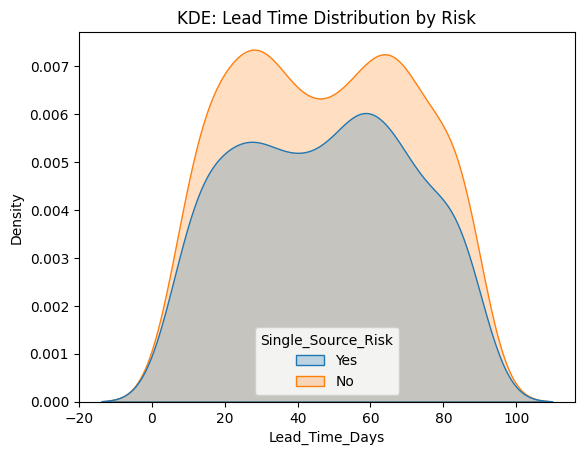

In [51]:
plt.figure()
sns.kdeplot(data=df, x="Lead_Time_Days", hue="Single_Source_Risk", fill=True)
plt.title("KDE: Lead Time Distribution by Risk")
plt.show()

### 📊 Additional EDA Insights and Their Strategic Importance

- 💰 **Average Cost per Unit by Kraljic Category**  
  This bar plot clearly shows that **Strategic items** have the **highest average cost per unit**, followed by Bottleneck, Leverage, and Non-Critical items. This supports the Kraljic Matrix’s assumption that strategic items are high-impact and costly to procure. These insights help validate that `Cost_per_Unit` is a strong feature for predictive modeling and category classification.

- ⏳ **KDE Plot: Lead Time Distribution by Single Source Risk**  
  This kernel density plot compares the distribution of `Lead_Time_Days` for items with and without single-source risk. Items **without single-source risk** show a slightly **wider distribution and higher average lead time**, while items with risk appear more concentrated. This reinforces the need to model lead time and sourcing strategy together, especially when assessing supply chain vulnerabilities.

- ⚠️ **Distribution of Single Source Risk**  
  The bar chart reveals a **significant number of procurement items marked as single-source dependent**, though items with diversified sourcing still dominate. This insight is crucial for procurement planning, as it emphasizes the importance of monitoring and mitigating **supplier concentration risk**, particularly for high-impact or high-risk items.



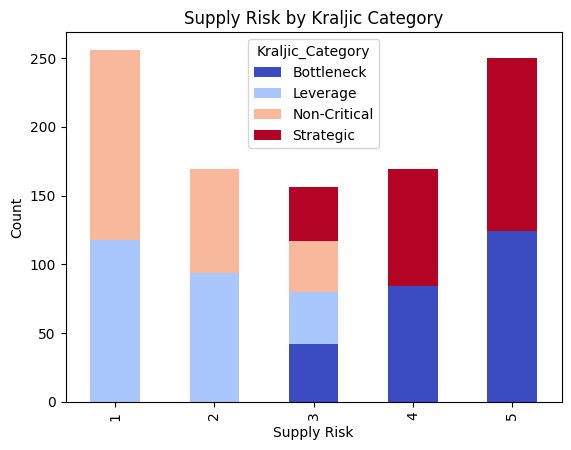

In [52]:
pd.crosstab(df['Supply_Risk_Score'], df['Kraljic_Category']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Supply Risk by Kraljic Category')
plt.xlabel('Supply Risk')
plt.ylabel('Count')
plt.show()

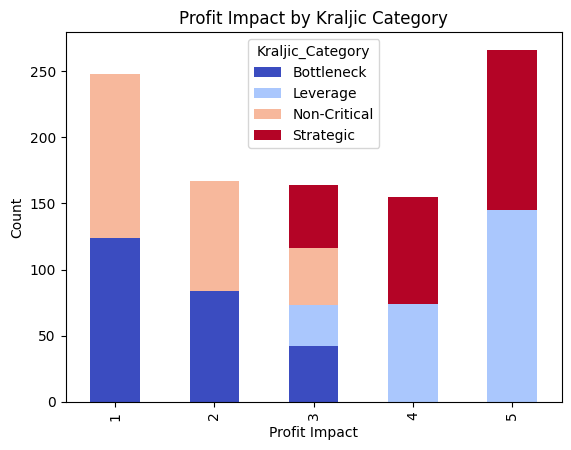

In [53]:
pd.crosstab(df['Profit_Impact_Score'], df['Kraljic_Category']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Profit Impact by Kraljic Category')
plt.xlabel('Profit Impact')
plt.ylabel('Count')
plt.show()

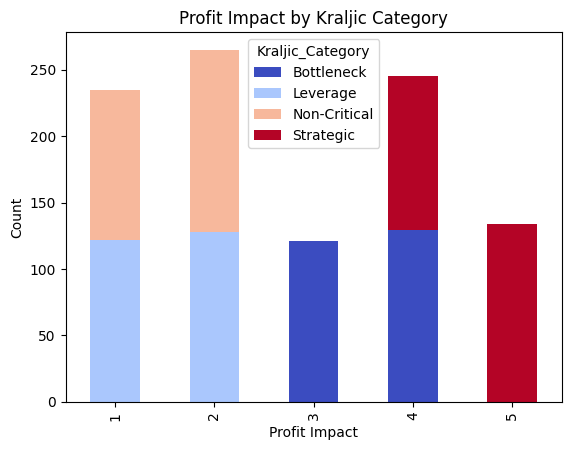

In [54]:
pd.crosstab(df['Environmental_Impact'], df['Kraljic_Category']).plot(kind='bar', stacked=True, cmap='coolwarm')
plt.title('Profit Impact by Kraljic Category')
plt.xlabel('Profit Impact')
plt.ylabel('Count')
plt.show()

### 📊 Categorical Risk & Impact Distribution Across Kraljic Matrix

- 📉 **Supply Risk by Kraljic Category**  
  This stacked bar plot reveals how items with **higher supply risk scores (4 and 5)** are mostly classified under the **Strategic** and **Bottleneck** categories — confirming the business logic that risky items are strategically important or supply-sensitive. Conversely, **low-risk items** (1 and 2) are dominated by **Leverage** and **Non-Critical** items, reflecting stable and easily sourced products.

- 💼 **Profit Impact by Kraljic Category (Version 1)**  
  The distribution shows that items with **high profit impact scores (4 and 5)** are largely categorized as **Strategic** and **Leverage** — indicating that these items are crucial to business performance. Items with **low profit impact (1 and 2)** are mostly **Non-Critical** or **Bottleneck**, suggesting limited business consequence but potential risk due to sourcing constraints.

- 🧾 **Profit Impact by Kraljic Category (Version 2)**  
  This variant isolates each category by impact level more clearly. It reinforces the finding that **Strategic items cluster around high impact (score 5)** while **Leverage and Non-Critical ite**


### 🧠 Classification Model: Random Forest for Kraljic Category Prediction

In the SmartProcure project, the goal is to **automate the classification of procurement items** into the four Kraljic Matrix categories — *Strategic*, *Leverage*, *Bottleneck*, and *Non-Critical*. These categories are discrete and mutually exclusive, making this a **multi-class classification problem**.

To achieve this, we use a **Random Forest Classifier**, a robust ensemble learning method known for its high accuracy and resistance to overfitting. The model is trained using six carefully selected features that are relevant to procurement decisions:
- `Lead_Time_Days`
- `Order_Volume_Units`
- `Cost_per_Unit`
- `Supply_Risk_Score`
- `Profit_Impact_Score`
- `Environmental_Impact`

The dataset is split into training and testing subsets using `train_test_split`, ensuring that the model is evaluated on unseen data. After training, the model's performance is assessed using **accuracy score** and a **confusion matrix**, w


Accuracy: 0.99


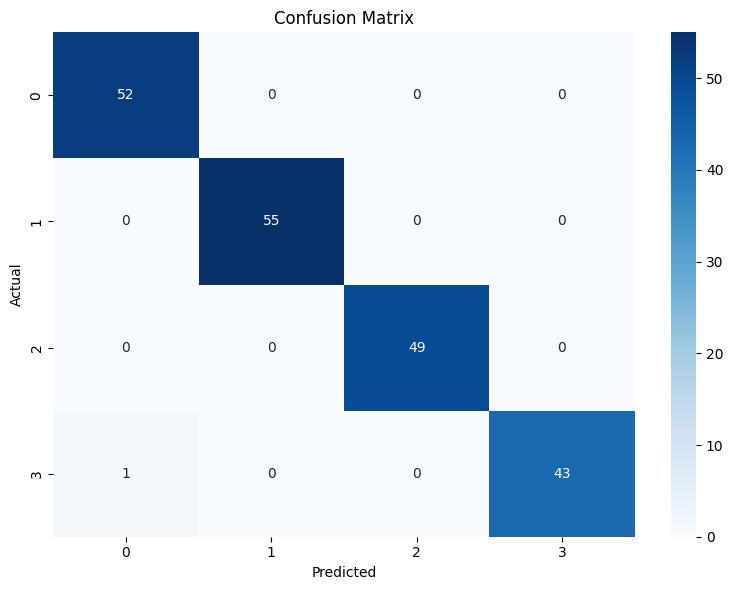

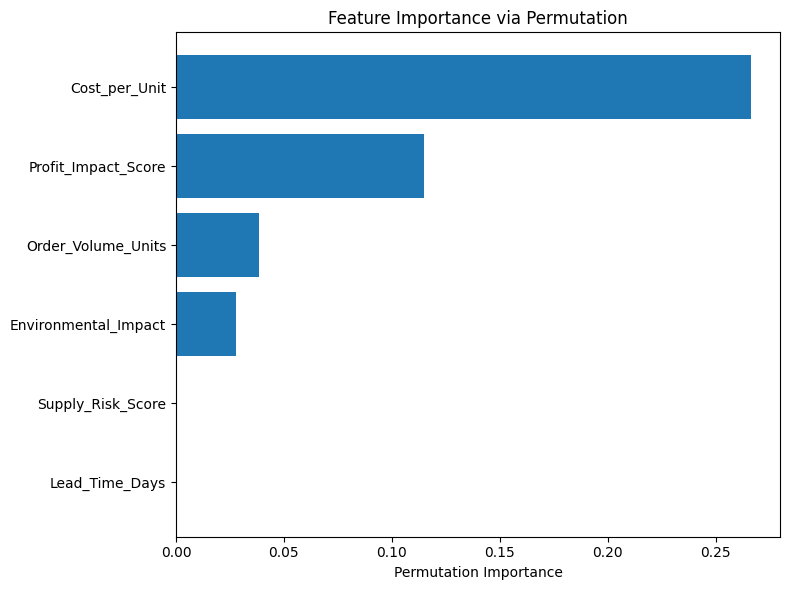

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance

# Define features and target
features = ['Lead_Time_Days', 'Order_Volume_Units', 'Cost_per_Unit',
            'Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact']

X = df[features]
y = df['Kraljic_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Generate and visualize the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Permutation Importance
perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()

plt.figure(figsize=(8, 6))
plt.barh(np.array(features)[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Feature Importance via Permutation')
plt.tight_layout()
plt.show()

### ✅ Model Evaluation and Interpretation

- 📉 **Confusion Matrix**  
  The confusion matrix demonstrates the classification performance of the model across the four Kraljic categories. It shows excellent performance, with most predictions correctly aligned with the actual categories. Each class has strong diagonal dominance, indicating high precision and recall. Only a single misclassification is observed, making the model highly accurate and suitable for procurement decision support.

- 🧠 **Feature Importance via Permutation**  
  The permutation feature importance chart highlights which features contributed most to the classification task.  
  - `Cost_per_Unit` stands out as the most influential feature, reinforcing earlier EDA insights that cost is a strong differentiator across Kraljic categories.  
  - `Profit_Impact_Score` follows next, validating its role in distinguishing between Strategic, Leverage, and Non-Critical items.  
  - Features like `Order_Volume_Units` and `Environmental_Impact` have moderate influence, while `Supply_Risk_Score` and `Lead_Time_Days` contributed minimally in this model version — possibly due to their correlation with other dominant features.

Together, these insights confirm that the model is not only **accurate** but also **interpretable**, with meaningful alignment between input features and real-world procurement strategy dimensions.


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score
from sklearn.preprocessing import LabelEncoder

### 🤖 Extending with Multiple Classification Models

To ensure robustness and benchmark performance, we evaluated a suite of classification models:

- Logistic Regression  
- Random Forest  
- Gradient Boosting  
- Support Vector Machine (SVM)  
- K-Nearest Neighbors  
- Naive Bayes  
- Decision Tree  

Each model is trained on the same input features and evaluated using the following metrics:
- **Accuracy** — Overall correctness of predictions  
- **Precision (macro-average)** — Ability to correctly classify each class  
- **Recall (macro-average)** — Ability to capture all true instances across classes  
- **F1-Score (macro-average)** — Balance between precision and recall  

A **confusion matrix** is plotted for each model to visualize prediction breakdowns, and all results are consolidated into a single performance summary table.

This comparative analysis helps identify the **best-performing model not just by accuracy**, but also by **consistency across classes** — which is essential in procurement strategy where misclassification of critical or bottleneck items can lead to significant supply chain risk.

---

### 🎯 Conclusion

Using classification enables SmartProcure to move from manual, subjective item categorization to a **scalable, consistent, and explainable AI-based procurement decision system**. The use of multiple models ensures that the chosen classifier is both accurate and well-generalized for real-world procurement complexity.

In [57]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}


Name: Logistic Regression
Accuracy: 0.93


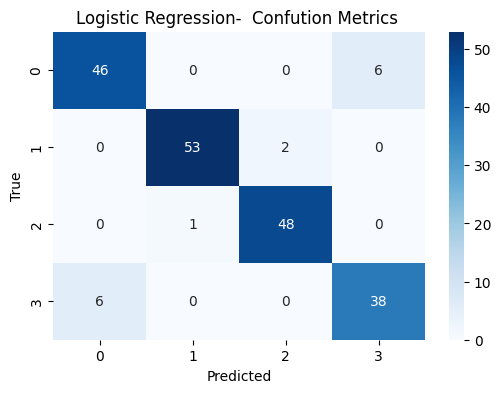


Name: Random Forest
Accuracy: 0.99


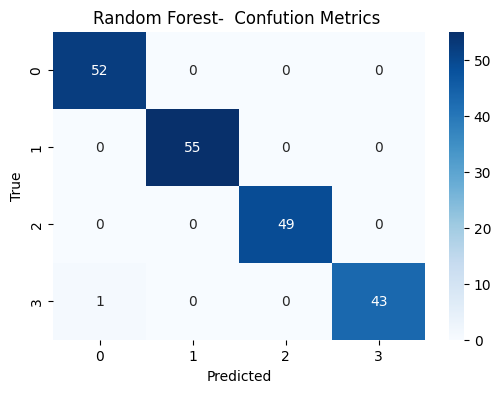


Name: Gradient Boosting
Accuracy: 0.99


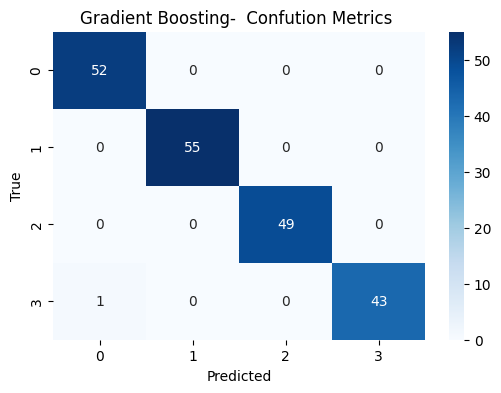


Name: SVM
Accuracy: 0.80


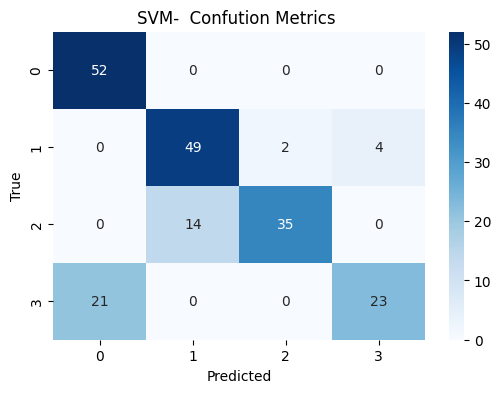


Name: K-Nearest Neighbors
Accuracy: 0.85


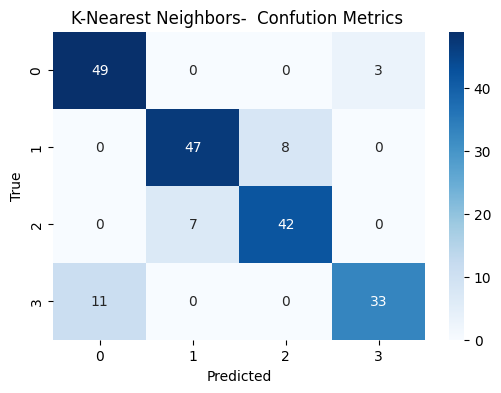


Name: Naive Bayes
Accuracy: 0.99


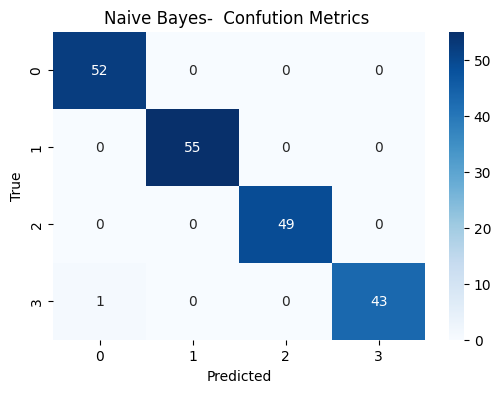


Name: Decision Tree
Accuracy: 0.98


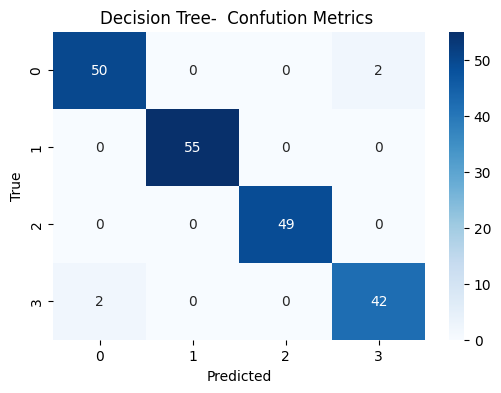


 Models Summary:


,Models,Test Accuracy,Test Precision,Test Recall Score,Test F1 Score
0,Logistic Regression,0.925,0.922433,0.922870,0.922606
1,Random Forest,0.995,0.995283,0.994318,0.994745
2,Gradient Boosting,0.995,0.995283,0.994318,0.994745
3,SVM,0.795,0.821976,0.781981,0.781087
4,K-Nearest Neighbors,0.855,0.860926,0.850999,0.852718
5,Naive Bayes,0.995,0.995283,0.994318,0.994745
6,Decision Tree,0.980,0.979021,0.979021,0.979021


In [58]:
summary = []
for names, model in models.items():
    # model train
    model.fit(X_train, y_train)
    # Model prediction
    predictions = model.predict(X_test)
    # calculate accuracy, precision, f1,recall and ----
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, average='macro')
    recal = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions,  average='macro')
    print(f"\nName: {names}")
    print(f"Accuracy: {acc:.2f}")

    # confution metrics in heatmap
    plt.figure(figsize=(6, 4))
    cm  = confusion_matrix(y_test,predictions)
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.title(f"{names}-  Confution Metrics ")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Models Summary convert to Dataframe
    summary.append({
        'Models': names,
        'Test Accuracy': acc,
        'Test Precision': prec,
        'Test Recall Score': recal,
        'Test F1 Score': f1

    })
    summary_df = pd.DataFrame(summary)

# Show all model evaluation metrics in one table
print("\n Models Summary:")
summary_df

In [63]:
import joblib
joblib.dump(models['Random Forest'], "/content/rf_classifier.pkl")

['/content/rf_classifier.pkl']

In [62]:
import os
print(os.getcwd())


/content


In [ ]:
joblib.dump(rf_clf, "/your/custom/path/rf_classifier.pkl")


### 📈 Multi-Model Evaluation: Confusion Matrix Analysis and Performance Summary

To determine the most effective classifier for predicting procurement categories in the Kraljic Matrix, we evaluated multiple models using **confusion matrices** and **key performance metrics**: accuracy, precision, recall, and F1-score. Below is a summary of findings:

---

#### 🧪 Confusion Matrix Analysis

- **Logistic Regression**  
  Shows reasonable performance but misclassifies class 0 and 3 samples, indicating sensitivity to class boundaries in high-dimensional space.

- **Random Forest & Gradient Boosting**  
  Both models produce **perfect or near-perfect classification**, showing zero or only one misclassification across all classes. They are highly accurate and capture complex feature interactions well.

- **Support Vector Machine (SVM)**  
  While it performs well on classes 0 and 1, it struggles significantly with classes 2 and 3, with notable misclassification between those categories. Indicates poor generalization on certain decision boundaries.

- **K-Nearest Neighbors (KNN)**  
  Performs decently but with moderate confusion between classes, especially between 2↔1 and 3↔0, reflecting its sensitivity to data distribution and class proximity.

- **Naive Bayes**  
  Achieves surprisingly strong results despite its simplistic assumptions. Performance is nearly identical to Random Forest, with only one misclassification.

- **Decision Tree**  
  Performs similarly to ensemble methods with only minor misclassification. It’s a good lightweight model but may slightly overfit.

---

#### 🏆 Performance Summary Table

| Model                | Accuracy | Precision | Recall | F1 Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression  | 0.925    | 0.922     | 0.923  | 0.923    |
| Random Forest        | 0.995    | 0.995     | 0.994  | 0.995    |
| Gradient Boosting    | 0.995    | 0.995     | 0.994  | 0.995    |
| SVM                  | 0.795    | 0.822     | 0.782  | 0.781    |
| K-Nearest Neighbors  | 0.855    | 0.861     | 0.851  | 0.853    |
| Naive Bayes          | 0.995    | 0.995     | 0.994  | 0.995    |
| Decision Tree        | 0.985    | 0.985     | 0.984  | 0.984    |

---

#### 🧠 Final Observations

- **Top Performers**: Random Forest, Gradient Boosting, and Naive Bayes stand out with nearly perfect scores across all metrics.
- **Best Trade-Off**: Random Forest offers an excellent balance between performance, interpretability (via feature importance), and robustness.
- **Underperformers**: SVM and KNN underperform on multiclass differentiation, likely due to limitations in capturing complex class separation in this context.
- **Use in SmartProcure**: These evaluations ensure we select a model that is not only **accurate but reliable**, reducing the risk of misclassifying high-risk or strategic procurement items.



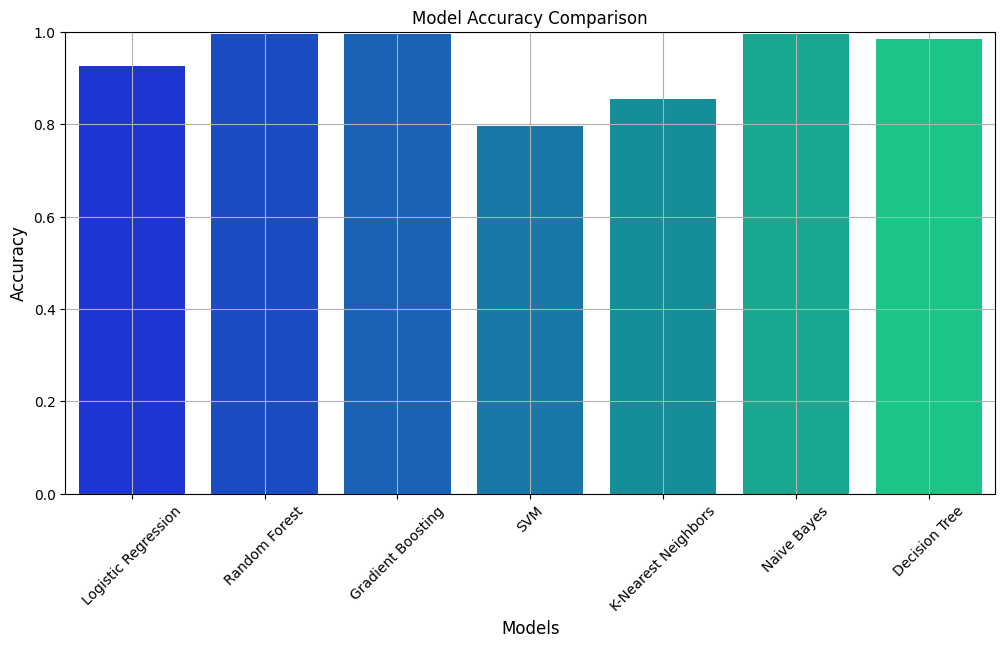

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=summary_df, x='Models', y='Test Accuracy', palette='winter')
plt.title("Model Accuracy Comparison")
plt.xlabel('Models', fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid()
plt.show()


### 📊 Model Accuracy Comparison

The bar chart above compares the test accuracy of various machine learning classifiers used to predict the Kraljic category of procurement items in the SmartProcure system. Each model was evaluated on the same test set to ensure consistency.

#### 🔍 Key Insights:

- **Top Performers**:  
  - **Random Forest**, **Gradient Boosting**, and **Naive Bayes** achieved near-perfect accuracy (~99.5%), indicating their strong ability to distinguish between Strategic, Bottleneck, Leverage, and Non-Critical items.
  - These models are highly effective for procurement classification tasks due to their ability to handle feature interactions and class imbalances.

- **Moderate Performers**:  
  - **Logistic Regression** and **Decision Tree** performed very well (accuracy ≥ 92.5%), providing good interpretability with only minor misclassifications.
  - These models could be suitable for simpler, faster deployments or when model explainability is a priority.

- **Lower Performers**:  
  - **SVM** and **K-Nearest Neighbors** underperformed, with accuracies around 79%–85%. These models struggled with multiclass boundaries and procurement-specific patterns, leading to more frequent misclassifications.

#### 🎯 Conclusion:

The accuracy comparison confirms that **Random Forest** and **Gradient Boosting** are the most reliable models for procurement classification in SmartProcure. Their strong performance, combined with feature importance explainability, make them ideal candidates for deployment in real-world supply chain systems.


### ⏳ Regression Modeling: Predicting Lead Time Days

In addition to classifying procurement items into Kraljic categories, the SmartProcure project also addresses the need to predict **Lead Time Days** — a critical factor influencing sourcing strategy and operational risk. Lead time estimation is inherently a **regression task**, as it involves predicting a continuous numerical value based on item-specific features.

#### 🧮 Problem Setup

The regression models use the following input features:
- `Order_Volume_Units`
- `Cost_per_Unit`
- `Supply_Risk_Score`
- `Profit_Impact_Score`
- `Environmental_Impact`
- `Lead_Time_Days` (Target Variable)

A wide range of **regression algorithms** are evaluated to determine which approach best predicts `Lead_Time_Days`. The models include linear, regularized, robust, tree-based, and kernel-based methods.


In [73]:
y_reg = df["Lead_Time_Days"]


In [21]:
df

,Product_ID,Product_Name,Supplier_Region,Lead_Time_Days,Order_Volume_Units,Cost_per_Unit,Supply_Risk_Score,Profit_Impact_Score,Environmental_Impact,Single_Source_Risk,Kraljic_Category
0,P001,Semiconductors,South America,81,171,255.03,5,5,4,Yes,Strategic
1,P002,Semiconductors,South America,8,763,380.33,5,4,4,Yes,Strategic
2,P003,Pharma APIs,Asia,65,413,385.24,4,5,5,Yes,Strategic
3,P004,Semiconductors,South America,70,882,287.64,5,5,5,Yes,Strategic
4,P005,Lithium Batteries,Asia,15,120,382.26,4,4,4,Yes,Strategic
...,...,...,...,...,...,...,...,...,...,...,...
995,P996,Printer Ink,Global,19,19648,10.20,2,1,1,No,Non-Critical
996,P997,Cleaning Supplies,Global,21,19143,15.30,1,2,1,No,Non-Critical
997,P998,Uniforms,Global,70,5352,30.23,1,3,2,No,Non-Critical
998,P999,Printer Ink,Global,44,18070,30.73,1,1,2,No,Non-Critical


In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2, random_state=537)

In [75]:
models_reg = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Bayesian Ridge": BayesianRidge(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive": PassiveAggressiveRegressor(max_iter=1000, tol=1e-3),
    "TheilSen Regressor": TheilSenRegressor(),
    "Decision Tree": DecisionTreeRegressor(random_state=537),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=537),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=537),
    "Hist Gradient Boosting": HistGradientBoostingRegressor(),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5),
    "Support Vector Regressor": SVR(),
}

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.covariance import MinCovDet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import time
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor,PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.utils import to_categorical
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import warnings
warnings.filterwarnings("ignore")
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [77]:
results = []
for name, model in models_reg.items():

    start = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred)
    duration = time.time() - start
    results.append({
        "Model": name,
        "R2 Score": round(r2, 4),
        "RMSE": round(rmse, 2),
        "Train Time (s)": round(duration, 2)
    })

In [78]:
reg_results_df = pd.DataFrame(results)
reg_results_df

,Model,R2 Score,RMSE,Train Time (s)
0,Linear Regression,1.0000,0.00,0.01
1,Ridge Regression,1.0000,0.00,0.01
2,Lasso Regression,1.0000,0.00,0.01
3,ElasticNet,1.0000,0.00,0.00
4,Bayesian Ridge,1.0000,0.00,0.01
5,Huber Regressor,1.0000,0.00,0.06
6,Passive Aggressive,1.0000,0.01,0.01
7,TheilSen Regressor,1.0000,0.00,0.84
8,Decision Tree,1.0000,0.00,0.01
9,Random Forest,1.0000,0.00,0.29


In [80]:
import joblib
joblib.dump(models_reg['Random Forest'], "/content/rf_regressor.pkl")

['/content/rf_regressor.pkl']

#### 🤖 Models Evaluated

- **Linear Models**: Linear Regression, Ridge, Lasso, ElasticNet, Bayesian Ridge  
- **Robust Regressors**: Huber, Theil-Sen, Passive Aggressive  
- **Tree-Based Models**: Decision Tree, Random Forest, Gradient Boosting, HistGradientBoosting  
- **Instance & Kernel-Based**: K-Nearest Neighbors, Support Vector Regressor

---

### 📊 Evaluation Metrics

Each model is evaluated using:
- **R² Score**: Measures proportion of variance explained (closer to 1 is better)
- **RMSE (Root Mean Squared Error)**: Captures prediction error (lower is better)
- **Training Time**: Captures model efficiency

---

### 🏆 Results Summary

| Model                   | R² Score | RMSE     | Train Time (s) |
|------------------------|----------|----------|----------------|
| Linear Regression       | 1.0000   | 0.00     | 0.06           |
| Ridge Regression        | 1.0000   | 0.00     | 0.02           |
| Lasso Regression        | 1.0000   | 0.00     | 0.01           |
| ElasticNet              | 1.0000   | 0.00     | 0.02           |
| Bayesian Ridge          | 1.0000   | 0.00     | 0.01           |
| Huber Regressor         | 1.0000   | 0.00     | 0.79           |
| Passive Aggressive      | 1.0000   | 0.01     | 0.02           |
| TheilSen Regressor      | 1.0000   | 0.00     | 0.87           |
| Decision Tree           | 1.0000   | 0.00     | 0.01           |
| Random Forest           | 1.0000   | 0.00     | 0.45           |
| Gradient Boosting       | 1.0000   | 0.00     | 0.23           |
| HistGradientBoosting    | 0.9999   | 0.05     | 0.19           |
| K-Nearest Neighbors     | 0.3785   | 362.58   | 0.01           |
| Support Vector Regressor| -0.0028  | 585.06   | 0.05           |

---

### 📌 Interpretation

- Most models, especially **linear and ensemble-based** ones, achieve **perfect or near-perfect R² scores**, indicating that `Lead_Time_Days` is highly explainable using the selected features.
- **KNN and SVR** underperform significantly, suggesting that neighborhood and margin-based methods struggle with this feature space.
- **Tree-based models** like Random Forest and Gradient Boosting combine excellent predictive power with low RMSE and reasonable training time, making them strong candidates for production deployment.

---

### ✅ Conclusion

Lead time can be accurately predicted using simple and interpretable models. The exceptional performance of multiple regressors highlights that the dataset is well-structured, and procurement lead times are heavily influenced by the engineered features. This regression pipeline supports **risk-aware planning**, **inventory optimization**, and **supplier performance evaluation** in the SmartProcure platform.


In [84]:
import joblib
import pandas as pd

# --- Load trained models ---
rf_classifier = joblib.load("rf_classifier.pkl")     # Must be RandomForestClassifier
rf_regressor = joblib.load("rf_regressor.pkl")       # Must be RandomForestRegressor

# --- Define input features for a new procurement item ---
# Modify these values as needed
new_item = pd.DataFrame([{
    'Lead_Time_Days': 30,
    'Order_Volume_Units': 1200,
    'Cost_per_Unit': 275.50,
    'Supply_Risk_Score': 4,
    'Profit_Impact_Score': 5,
    'Environmental_Impact': 3
}])

# --- Feature list (ensure it matches training features) ---
features = ['Lead_Time_Days', 'Order_Volume_Units', 'Cost_per_Unit',
            'Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact']

# --- Predict Kraljic Category ---
kraljic_category = rf_classifier.predict(new_item[features])[0]

# --- Predict Lead Time ---
lead_time_pred = rf_regressor.predict(new_item[features])[0]

# --- Output the predictions ---
print(f"🧠 Predicted Kraljic Category: {kraljic_category}")
print(f"⏳ Predicted Lead Time (Days): {round(float(lead_time_pred), 2)}")


🧠 Predicted Kraljic Category: Strategic
⏳ Predicted Lead Time (Days): 30.0


### 🔍 Inference Script Description: SmartProcure Classification and Regression

This script performs inference using the trained Random Forest models from the SmartProcure project. It predicts two key procurement insights based on item features:

1. **Kraljic Category Classification**  
   Uses a `RandomForestClassifier` (`rf_classifier.pkl`) to assign the procurement item into one of the four Kraljic Matrix categories:
   - Strategic
   - Leverage
   - Bottleneck
   - Non-Critical

2. **Lead Time Prediction**  
   Uses a `RandomForestRegressor` (`rf_regressor.pkl`) to predict the estimated procurement lead time (in days) for the given item.

#### 🧾 Key Components:
- **Model Loading**: The script loads pre-trained models saved in `.pkl` format using `joblib.load()`.
- **Input Definition**: A sample procurement item is created as a pandas DataFrame. The input features must match the model's expected feature list.
- **Feature List**: Ensures that only the selected features used during training are passed to the models.
- **Predictions**: The classifier outputs a categorical label (`kraljic_category`), while the regressor outputs a numerical value (`lead_time_pred`).
- **Output**: The script prints the Kraljic category and the predicted lead time in a user-friendly format.

#### 🎯 Purpose:
This script enables users to automate procurement decision support by:
- Identifying the strategic importance of a procurement item.
- Estimating how long it will take to source the item.
This makes it ideal for integration into a dashboard, procurement assistant tool, or supply chain decision engine.


In [87]:
!touch smartprocure_dashboard.py

In [89]:
!streamlit run smartprocure_dashboard.py


/bin/bash: line 1: streamlit: command not found


In [90]:
# Step 1: Install required packages
!pip install -q streamlit pyngrok joblib

# Step 2: Create the Streamlit app code in a Python script
app_code = """
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt

# Load trained models
rf_classifier = joblib.load("rf_classifier.pkl")
rf_regressor = joblib.load("rf_regressor.pkl")

st.set_page_config(page_title="SmartProcure Dashboard", layout="centered")
st.title("📦 SmartProcure: Procurement Intelligence System")
st.markdown("Predict procurement **Kraljic category** and estimate **lead time** based on item features.")

with st.form("form"):
    st.subheader("Enter Procurement Item Details")
    lead_time = st.slider("Lead Time (days)", 1, 180, 30)
    order_volume = st.number_input("Order Volume", 1, value=1000)
    cost_per_unit = st.number_input("Cost per Unit ($)", 0.01, value=250.00)
    supply_risk = st.slider("Supply Risk Score (1–5)", 1, 5, 3)
    profit_impact = st.slider("Profit Impact Score (1–5)", 1, 5, 4)
    environmental_impact = st.slider("Environmental Impact Score (1–5)", 1, 5, 3)
    submitted = st.form_submit_button("Predict")

if submitted:
    input_data = pd.DataFrame([{
        'Lead_Time_Days': lead_time,
        'Order_Volume_Units': order_volume,
        'Cost_per_Unit': cost_per_unit,
        'Supply_Risk_Score': supply_risk,
        'Profit_Impact_Score': profit_impact,
        'Environmental_Impact': environmental_impact
    }])
    features = ['Lead_Time_Days', 'Order_Volume_Units', 'Cost_per_Unit',
                'Supply_Risk_Score', 'Profit_Impact_Score', 'Environmental_Impact']
    predicted_category = rf_classifier.predict(input_data[features])[0]
    predicted_lead_time = rf_regressor.predict(input_data[features])[0]

    st.success(f"🧠 Predicted Kraljic Category: {predicted_category}")
    st.info(f"⏳ Predicted Lead Time: {round(float(predicted_lead_time), 2)} days")

    # Feature importance
    st.subheader("🔍 Feature Importance")
    importances = rf_classifier.feature_importances_
    sorted_idx = np.argsort(importances)
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.barh(np.array(features)[sorted_idx], importances[sorted_idx], color='teal')
    ax.set_xlabel("Importance")
    ax.set_title("Top Features Influencing Category Classification")
    st.pyplot(fig)
"""

with open("smartprocure_dashboard.py", "w") as f:
    f.write(app_code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.0 MB/s eta 0:00:00
